In [9]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
income_df = pd.read_csv("income.csv")
income_df.head()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"


In [11]:
data = income_df.copy()

In [12]:
print(data.info()) //Checking the data type of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        31978 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     31978 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB
None


In [14]:
data.isnull().sum() // to check missing values

age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64

In [15]:
data.describe()

,age,capitalgain,capitalloss,hoursperweek
count,31978.000000,31978.000000,31978.000000,31978.000000
mean,38.579023,1064.360623,86.739352,40.417850
std,13.662085,7298.596271,401.594301,12.345285
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


In [17]:
data.describe(include = "O")

,JobType,EdType,maritalstatus,occupation,relationship,race,gender,nativecountry,SalStat
count,31978,31978,31978,31978,31978,31978,31978,31978,31978
unique,9,16,7,15,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,"less than or equal to 50,000"
freq,22286,10368,14692,4038,12947,27430,21370,29170,24283


In [18]:
data['JobType'].value_counts()
data['occupation'].value_counts()


 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1966
 ?                    1816
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: occupation, dtype: int64

In [20]:
np.unique(data["JobType"])

array([' ?', ' Federal-gov', ' Local-gov', ' Never-worked', ' Private',
       ' Self-emp-inc', ' Self-emp-not-inc', ' State-gov', ' Without-pay'],
      dtype=object)

In [21]:
data = pd.read_csv('income.csv', na_values=[" ?"])

In [22]:
data.isnull().sum()

age                 0
JobType          1809
EdType              0
maritalstatus       0
occupation       1816
relationship        0
race                0
gender              0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry       0
SalStat             0
dtype: int64

In [24]:
data[data.isnull().any(axis=1)]

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
8,17,NaN,11th,Never-married,NaN,Own-child,White,Female,0,0,5,United-States,"less than or equal to 50,000"
17,32,NaN,Some-college,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
29,22,NaN,Some-college,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
42,52,NaN,12th,Never-married,NaN,Other-relative,Black,Male,594,0,40,United-States,"less than or equal to 50,000"
44,63,NaN,1st-4th,Married-civ-spouse,NaN,Husband,White,Male,0,0,35,United-States,"less than or equal to 50,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31892,59,NaN,Bachelors,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
31934,20,NaN,HS-grad,Never-married,NaN,Other-relative,White,Female,0,0,35,United-States,"less than or equal to 50,000"
31945,28,NaN,Some-college,Married-civ-spouse,NaN,Wife,White,Female,0,1887,40,United-States,"greater than 50,000"
31967,80,NaN,HS-grad,Widowed,NaN,Not-in-family,White,Male,0,0,24,United-States,"less than or equal to 50,000"


In [33]:
data_new = data.dropna(axis=0)

In [26]:
data_new.corr()

C:\Users\PRATHAM\AppData\Local\Temp\ipykernel_21484\1028493740.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_new.corr()


,age,capitalgain,capitalloss,hoursperweek
age,1.000000,0.080154,0.060165,0.101599
capitalgain,0.080154,1.000000,-0.032229,0.080432
capitalloss,0.060165,-0.032229,1.000000,0.052417
hoursperweek,0.101599,0.080432,0.052417,1.000000


In [29]:
gender = pd.crosstab(index = data_new['gender'],
                        columns = "count",
                        normalize = True)
gender

col_0,count
gender,
Female,0.324315
Male,0.675685


In [30]:
genderStat = pd.crosstab(index = data_new['gender'],
                        columns = data_new['SalStat'],
                         margins = True,
                        normalize = 'index')
genderStat

SalStat,"greater than 50,000","less than or equal to 50,000"
gender,,
Female,0.113678,0.886322
Male,0.313837,0.686163
All,0.248922,0.751078


C:\Users\PRATHAM\AppData\Local\Temp\ipykernel_21484\3119713017.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_new['age'], bins=10, kde=False)


<Axes: xlabel='age'>

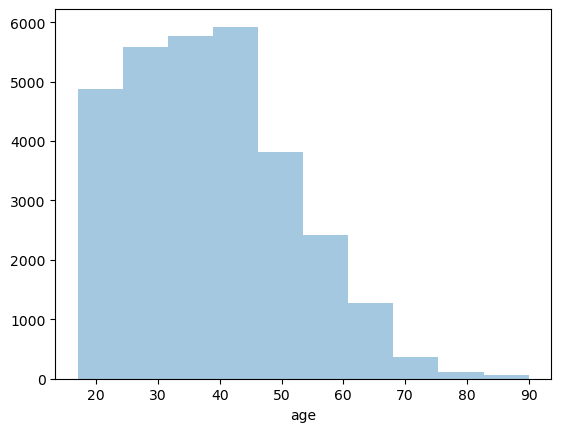

In [34]:
sns.distplot(data_new['age'], bins=10, kde=False)

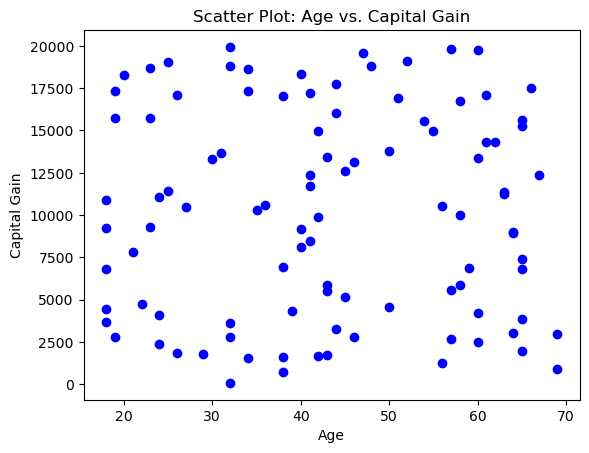

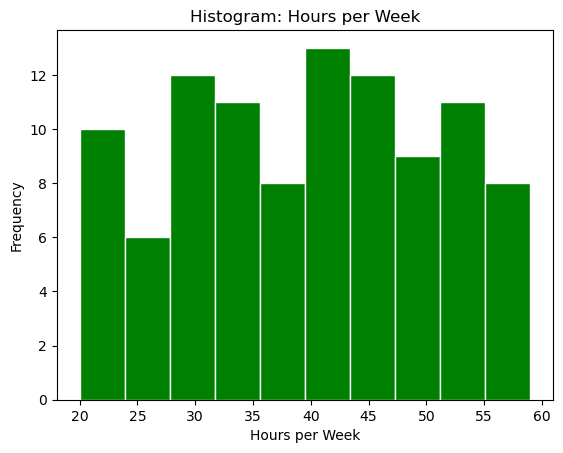

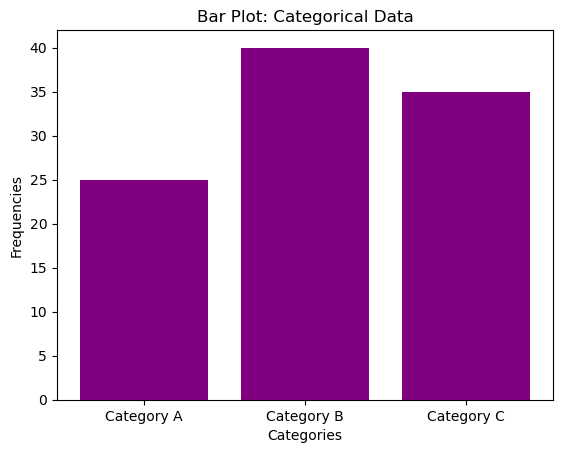

In [35]:

import matplotlib.pyplot as plt

# Example data
age = np.random.randint(18, 70, size=100)
capitalgain = np.random.randint(0, 20000, size=100)
capitalloss = np.random.randint(0, 2000, size=100)
hoursperweek = np.random.randint(20, 60, size=100)


